# Visualizando Dados

## Gráficos básicos

In [16]:
library("graphics")
library("tidyverse")
library(magrittr)


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




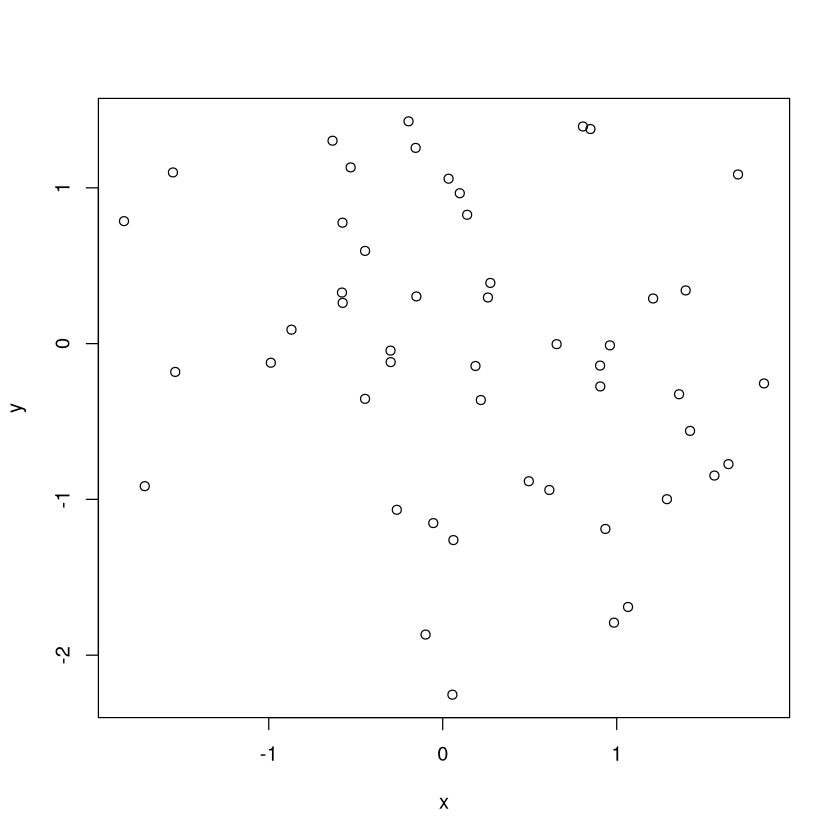

In [2]:
x <- rnorm(50)
y <- rnorm(50)
plot(x,y)

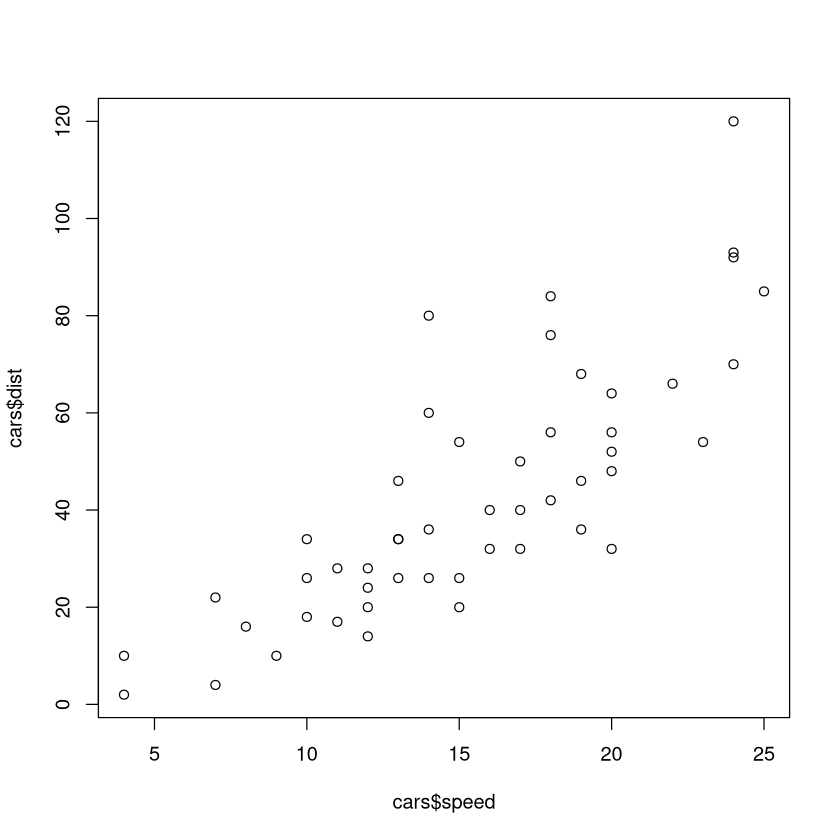

In [14]:
data(cars)
plot(cars$speed, cars$dist)

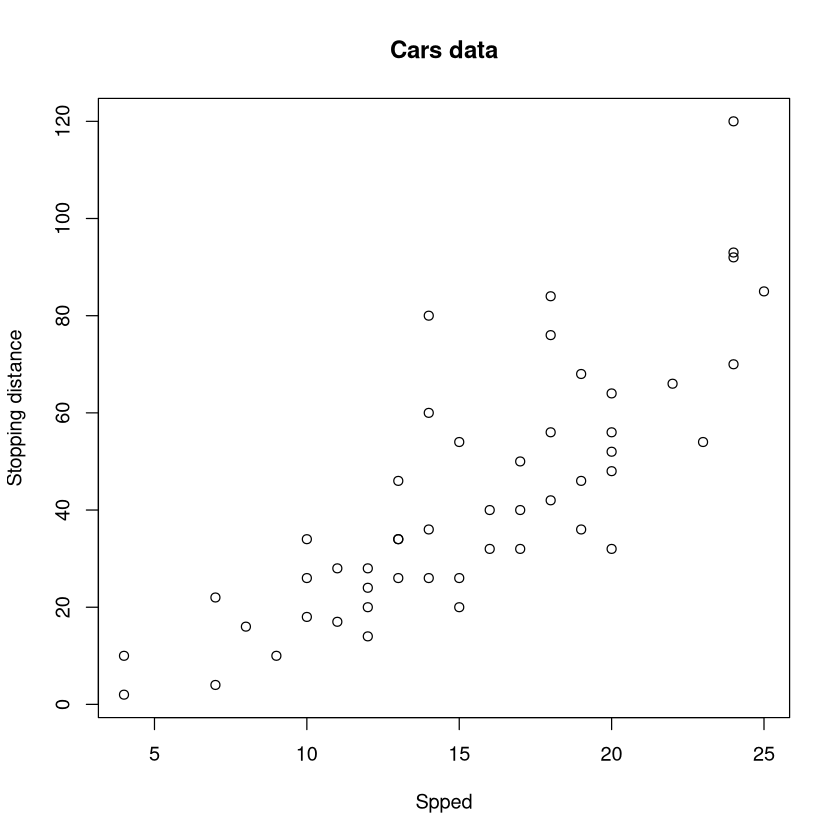

In [21]:
cars %$% plot(speed, dist, main="Cars data", xlab="Spped", ylab="Stopping distance")

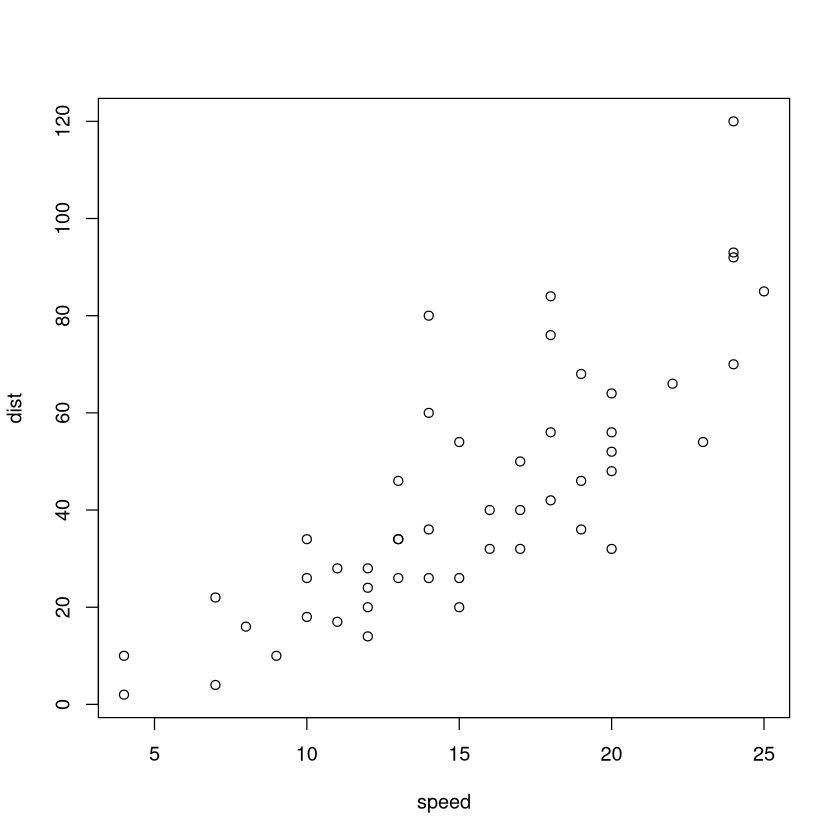

In [22]:
cars %>% plot(dist ~ speed , data = .)

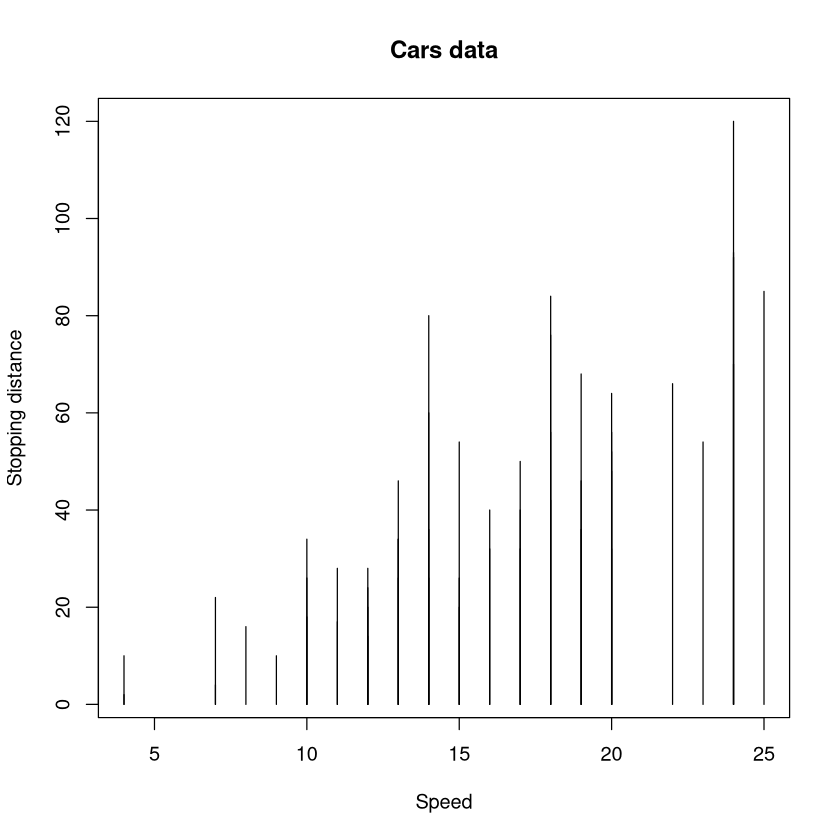

In [23]:
cars %$% plot(speed, dist, main="Cars data", type="h",
              xlab="Speed", ylab="Stopping distance")

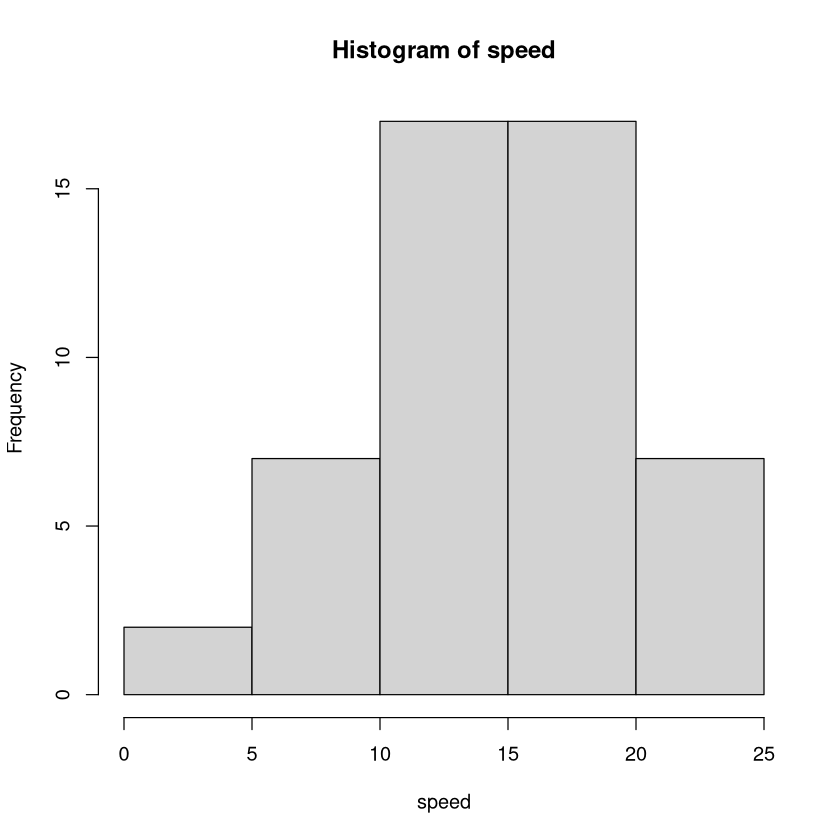

In [26]:
cars %$% hist(speed)

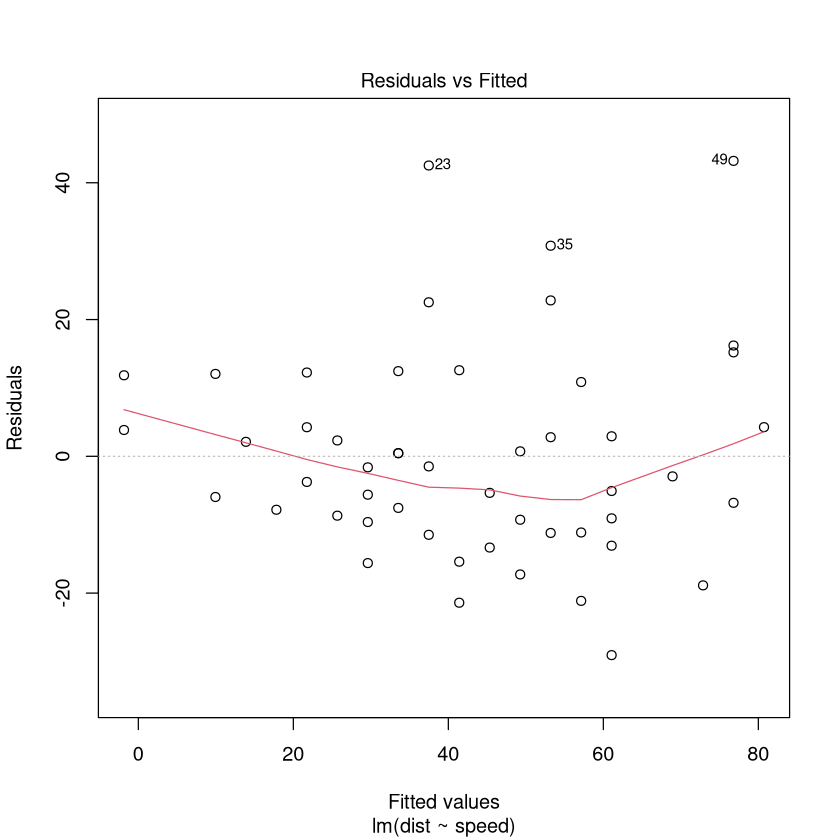

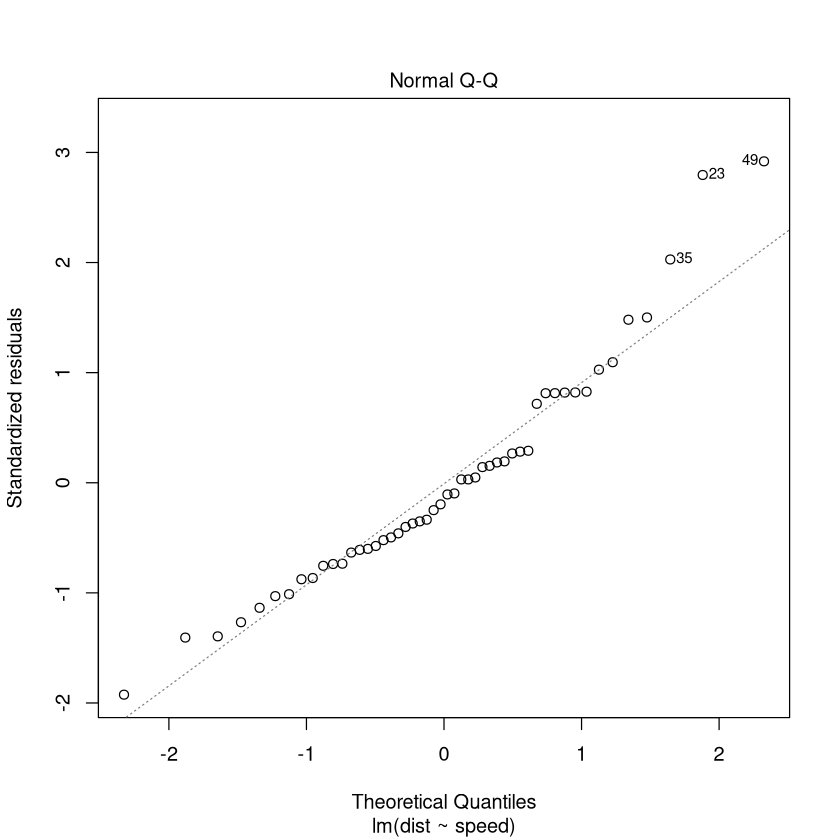

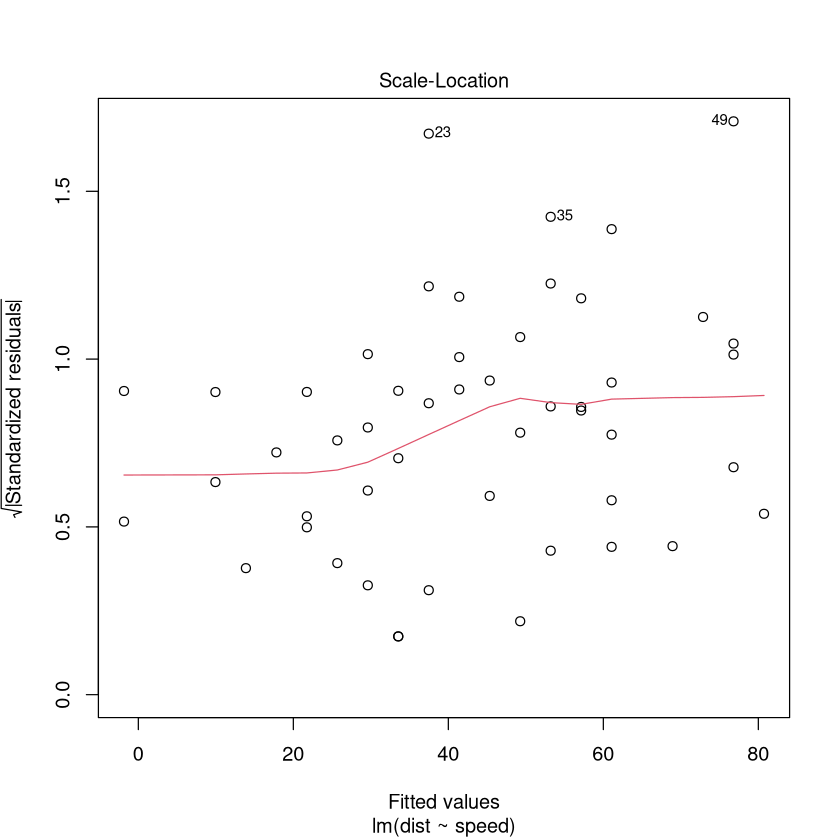

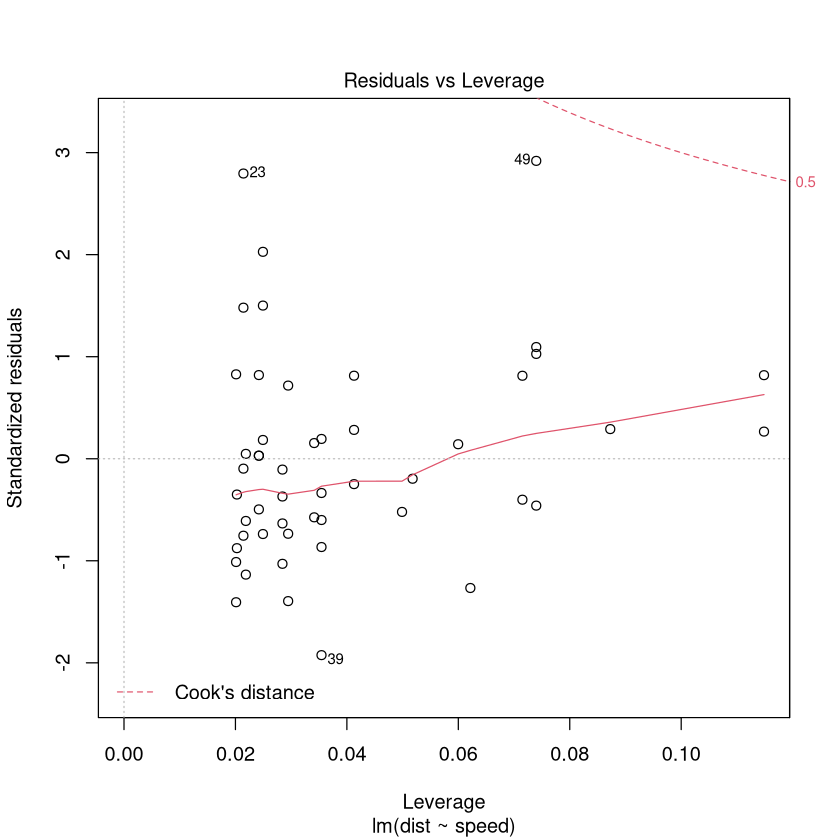

In [27]:
cars %>% lm(dist ~ speed, data = .) %>% plot

In [28]:
data(longley)

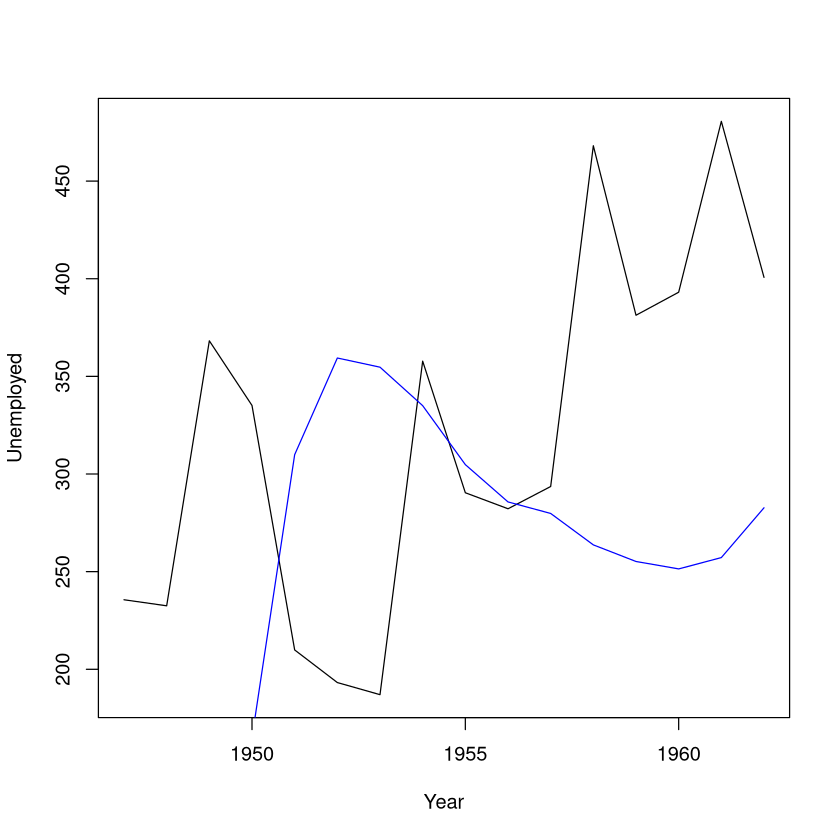

In [31]:
longley %>% plot(Unemployed ~ Year, data = ., type = 'l')
longley %>% lines(Armed.Forces ~ Year, data = ., col = "blue")

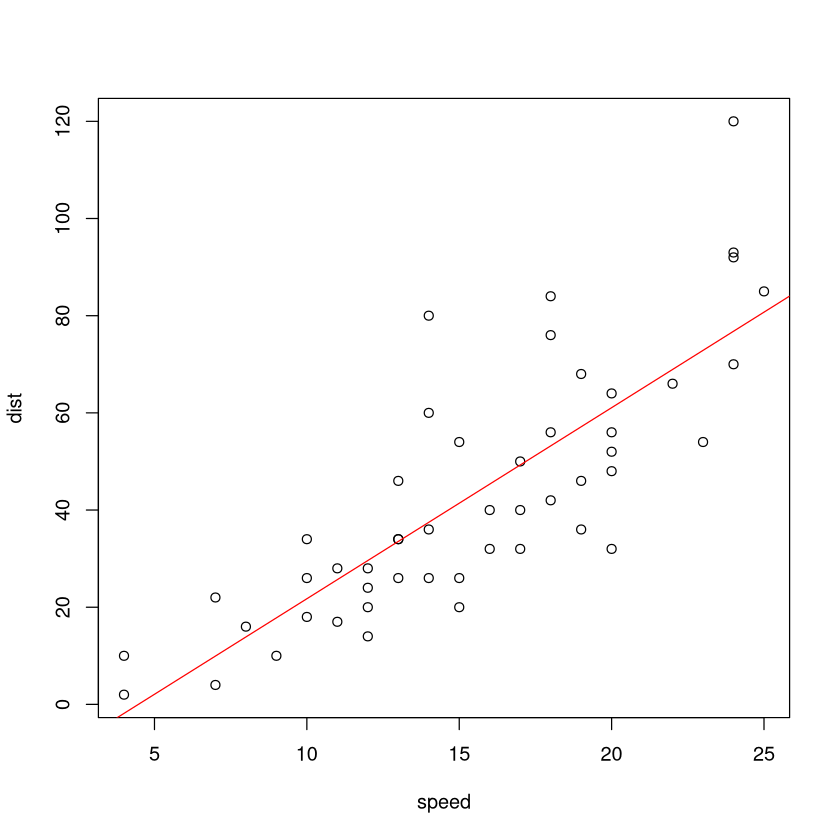

In [32]:
cars %>% plot(dist~ speed, data = .)
cars %>% lm(dist ~ speed, data = . ) %>% abline(col="red")

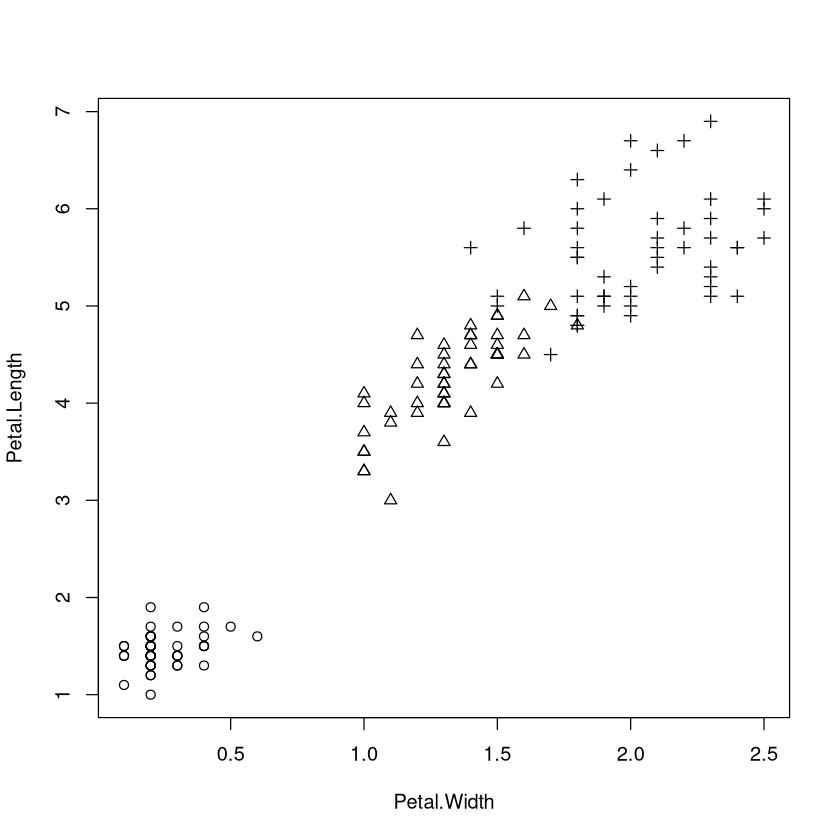

In [33]:
shape_map <- c("setosa" = 1,
               "versicolor" = 2,
               "virginica" = 3)

iris %$% plot(Petal.Length ~ Petal.Width, pch = shape_map[Species])

## A gramática dos gráficos com o pacote `ggplot2`

In [35]:
library(ggplot2)

### Usando `qplot()`

A função `qplot()` pode ser usada para plotar gráficos de dispersão de forma siplificada.

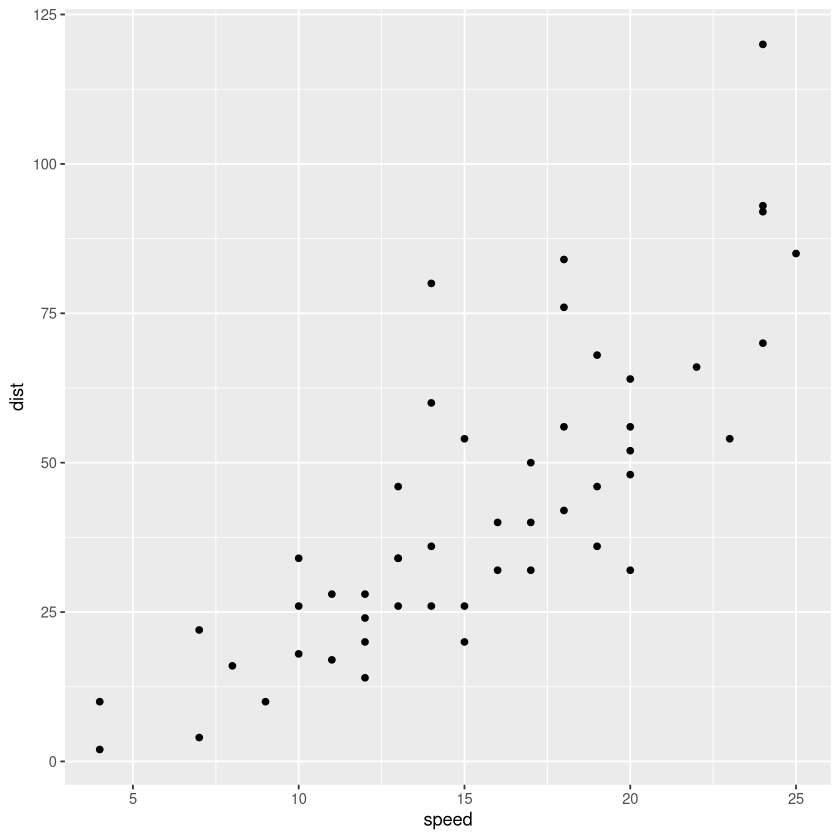

In [36]:
cars %>% qplot(speed, dist, data = .)

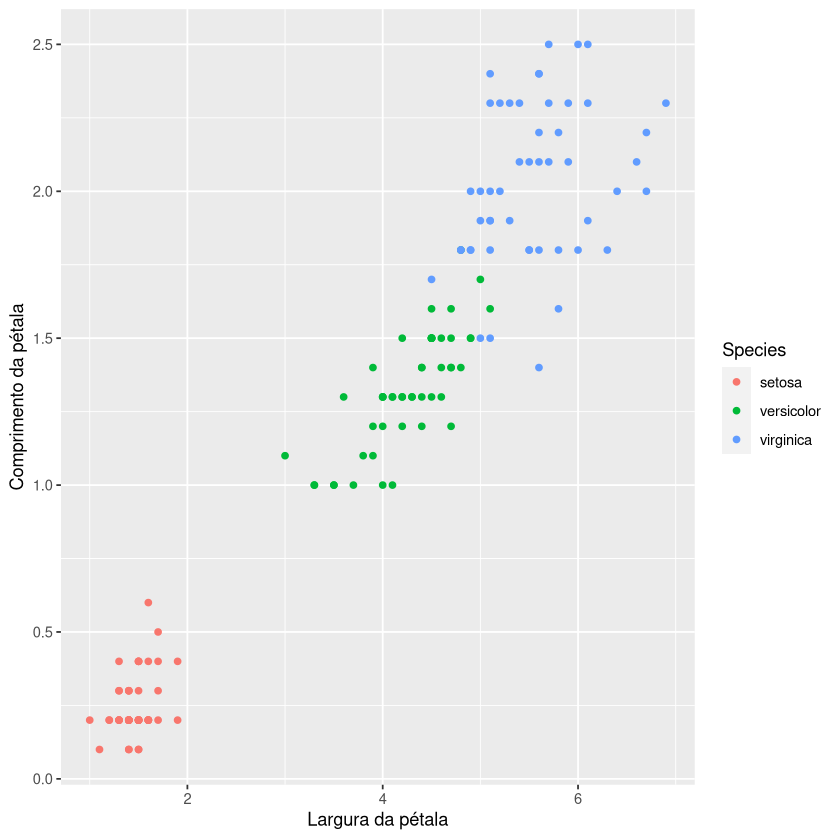

In [39]:
iris %>% qplot(Petal.Length, Petal.Width, color = Species, data = .) +
    xlab("Largura da pétala") +
    ylab("Comprimento da pétala")

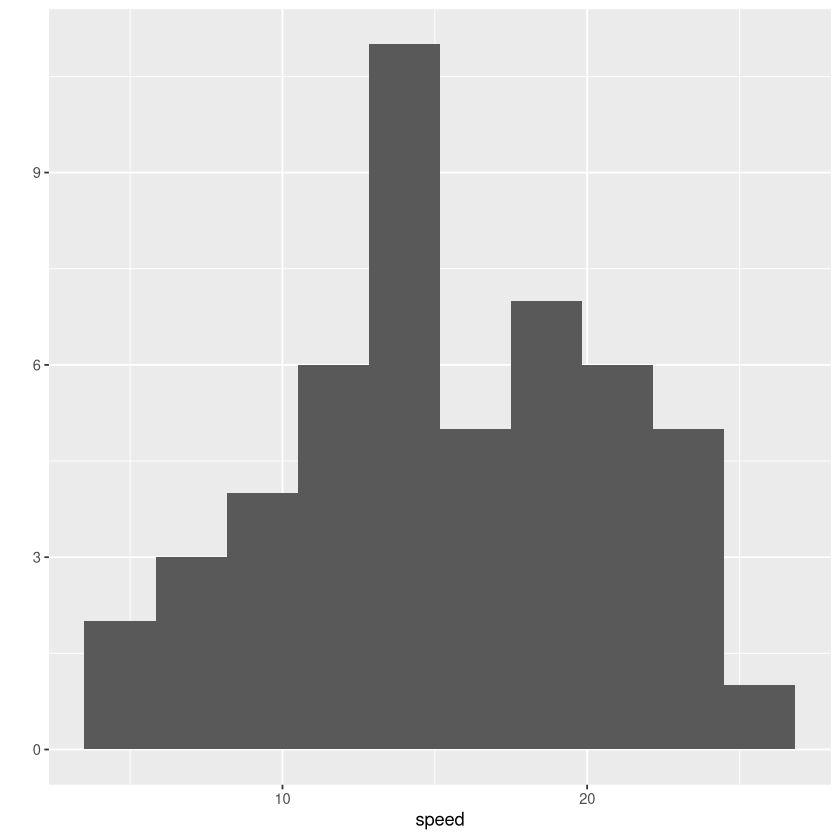

In [45]:
cars %>% qplot(speed, data = ., bins = 10)

### Usando Geometrias

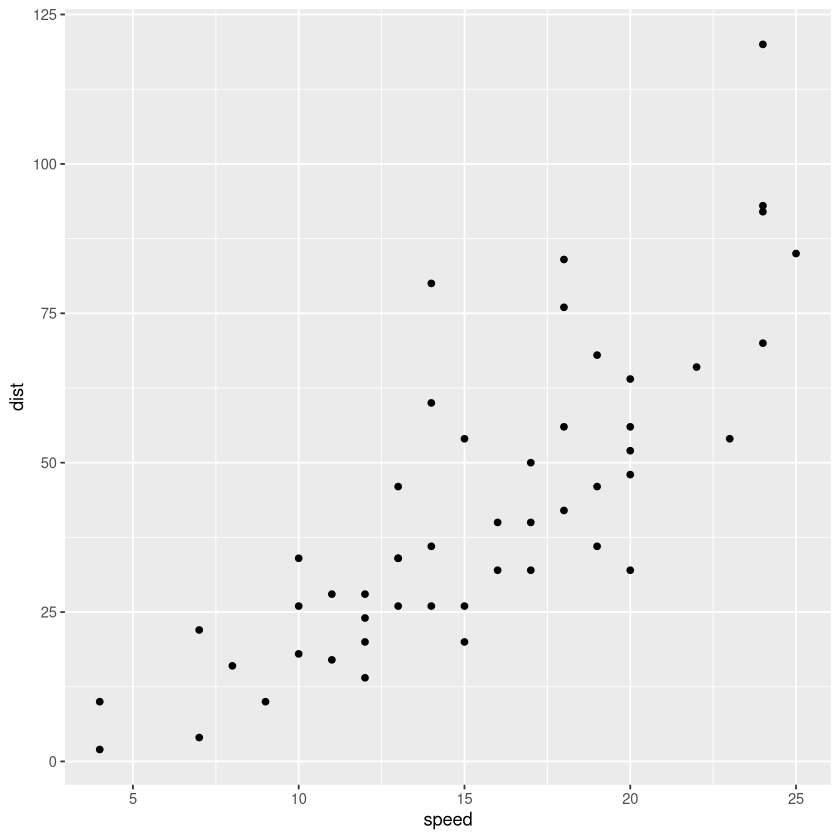

In [46]:
ggplot(cars) + geom_point(aes(x = speed, y = dist))

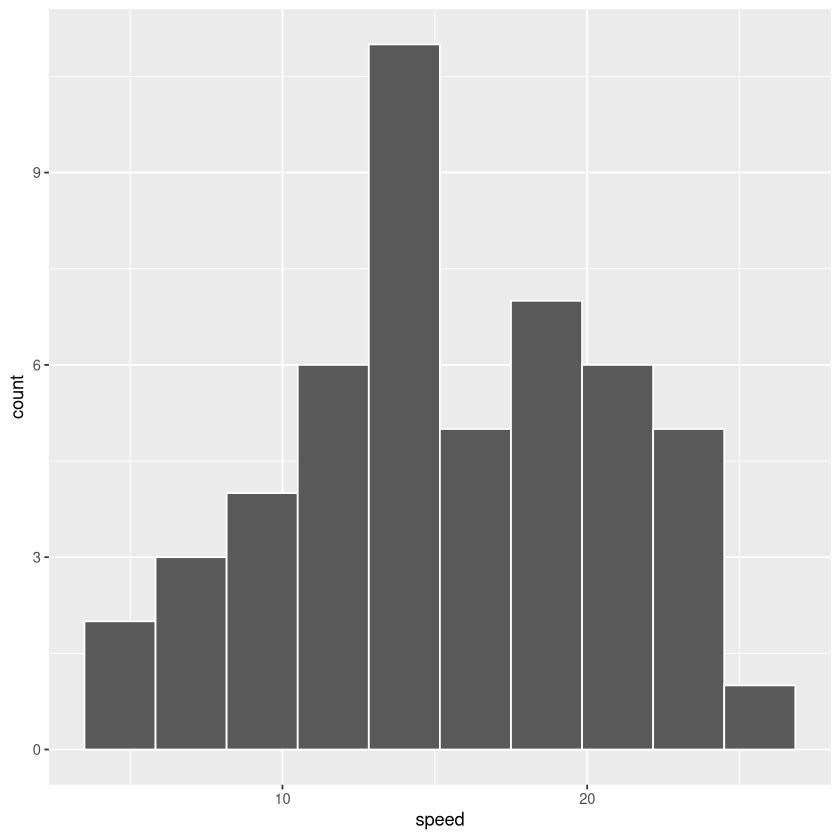

In [48]:
cars %>% ggplot + geom_histogram(aes(x = speed), bins = 10, color = "white")

`geom_smooth()` using formula 'y ~ x'



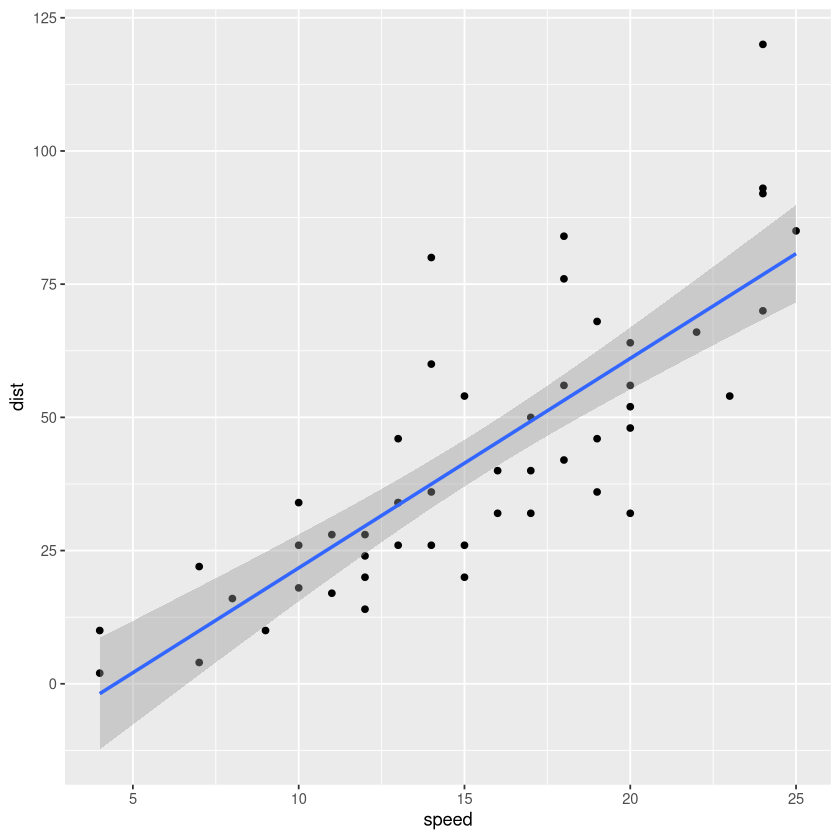

In [49]:
cars %>% ggplot(aes(x = speed, y = dist)) +
    geom_point() + geom_smooth(method = "lm")

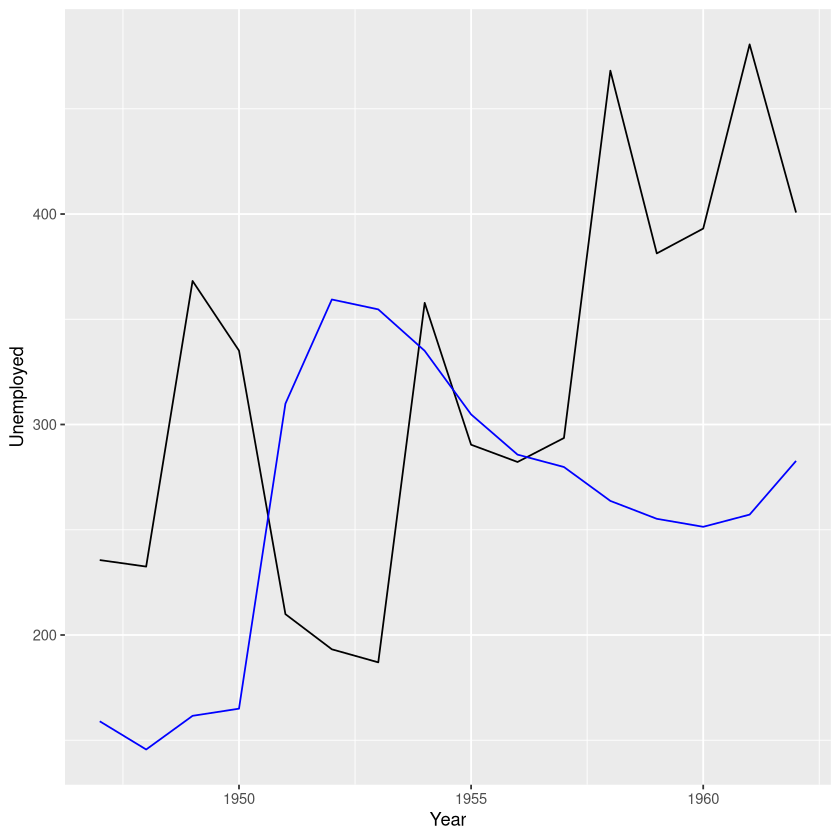

In [50]:
longley %>% ggplot(aes(x = Year)) + 
    geom_line(aes(y = Unemployed)) + 
    geom_line(aes(y = Armed.Forces), color="blue")

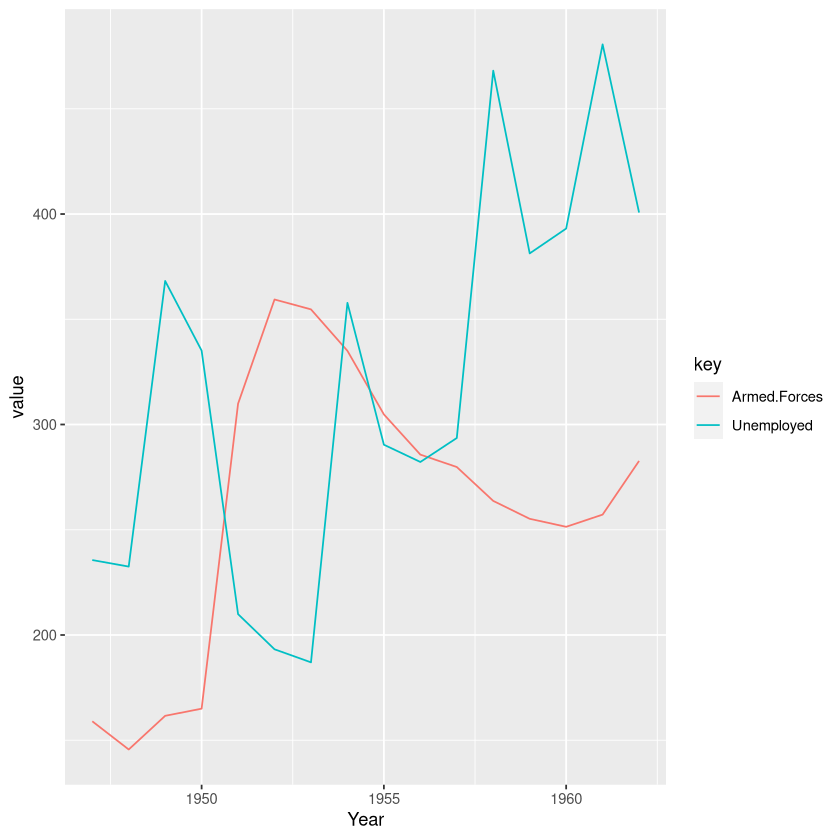

In [51]:
longley %>% gather(key, value, Unemployed, Armed.Forces) %>%
    ggplot(aes(x = Year, y = value, color = key)) + geom_line()

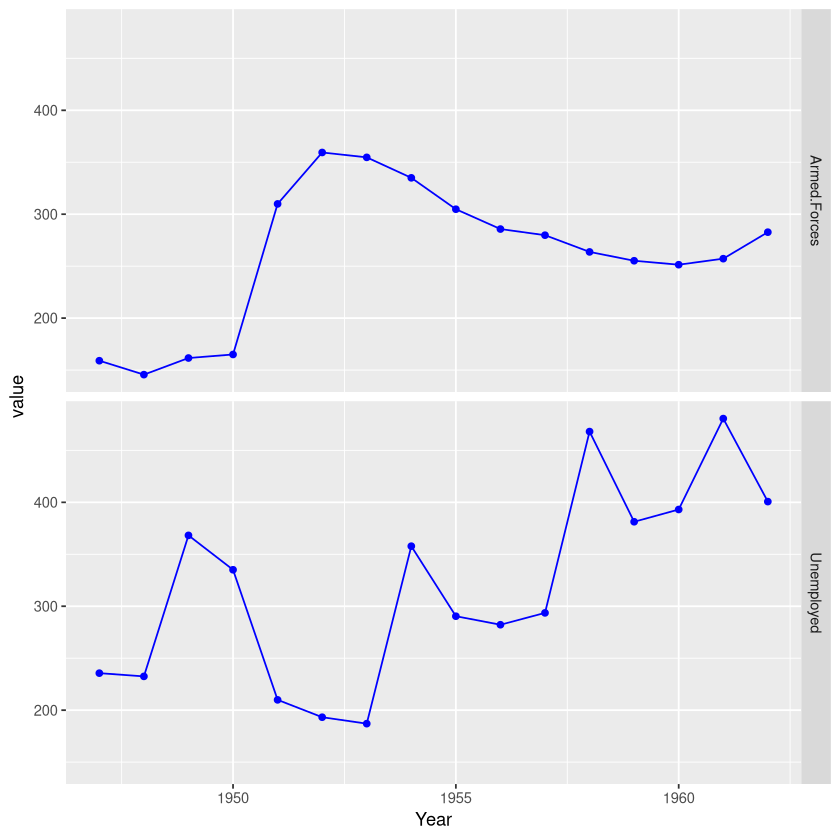

In [56]:
longley %>% gather(key, value, Unemployed, Armed.Forces) %>%
    ggplot(aes(x = Year, y = value)) + 
    geom_line(color = "blue") + 
    geom_point(color = "blue") + 
    facet_grid(key ~ .)

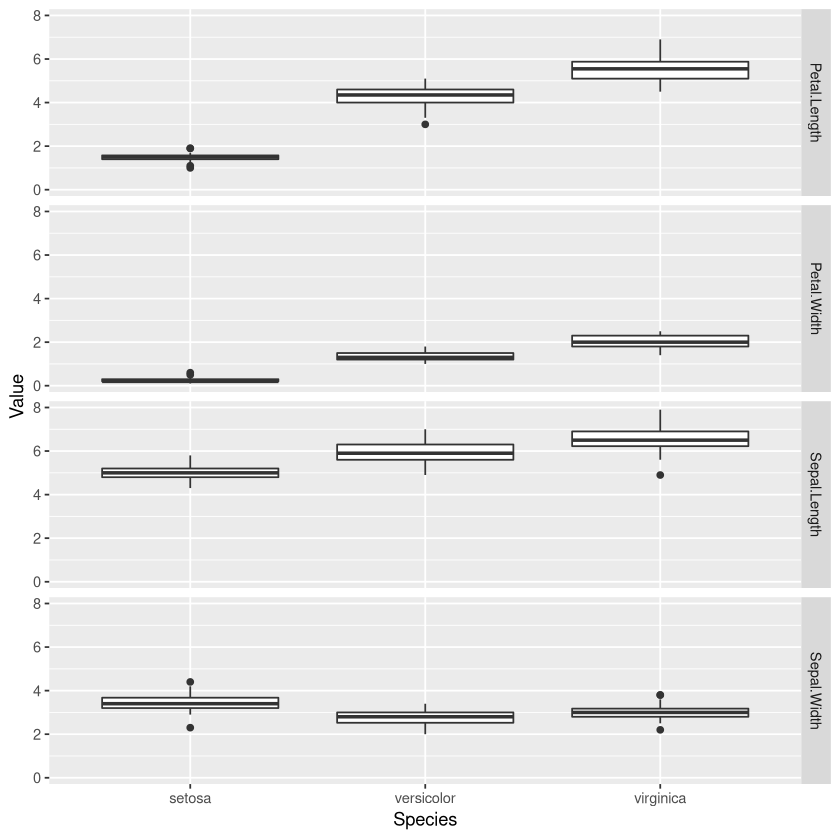

In [57]:
iris %>% gather(Measurement, Value, -Species) %>%
    ggplot(aes(x = Species, y = Value)) +
    geom_boxplot() + 
    facet_grid(Measurement ~ .)

In [58]:
label_map <- c(Petal.Width = "Petal Width",
               Petal.Length = "Petal Length",
               Sepal.Width = "Sepal Width",
               Sepal.Length = "Sepal Length")

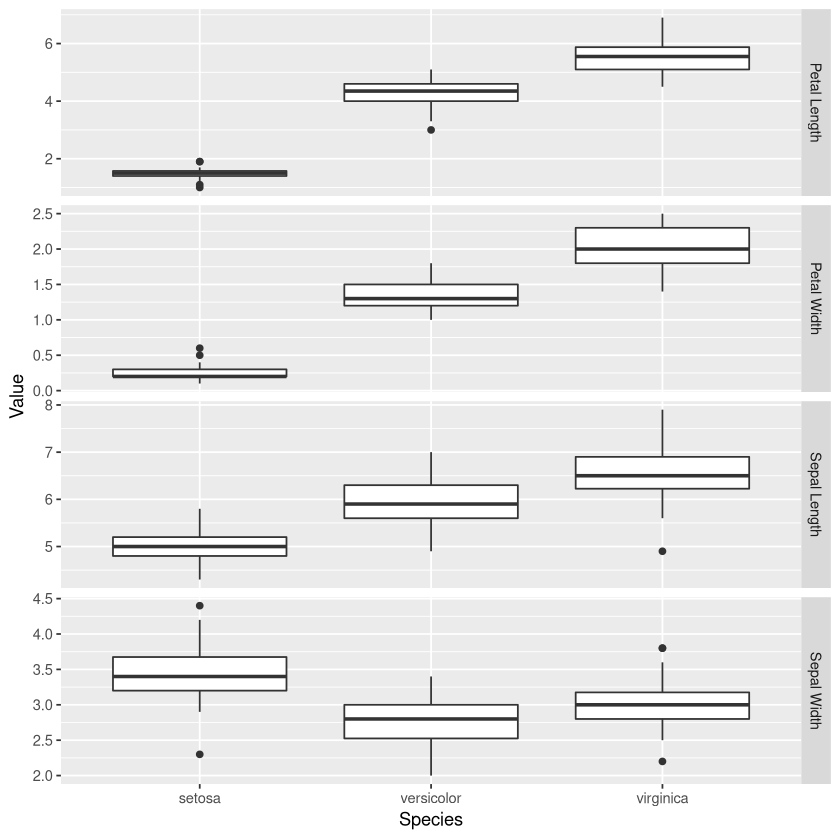

In [59]:
iris %>% gather(Measurement, Value, -Species) %>%
    ggplot(aes(x = Species, y = Value)) + 
    geom_boxplot() +
    facet_grid(Measurement ~ ., scale = "free_y",
               labeller = labeller(Measurement = label_map))

`geom_smooth()` using formula 'y ~ x'



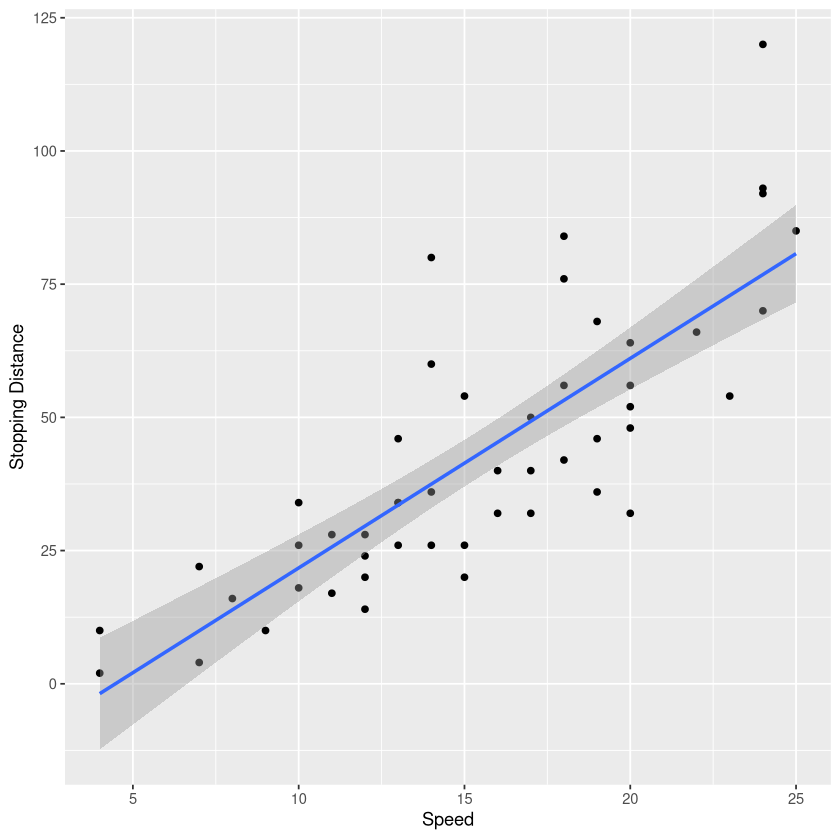

In [60]:
cars %>% ggplot(aes(x = speed, y = dist)) +
    geom_point() + geom_smooth(method = "lm") + 
    scale_x_continuous("Speed") + 
    scale_y_continuous("Stopping Distance")

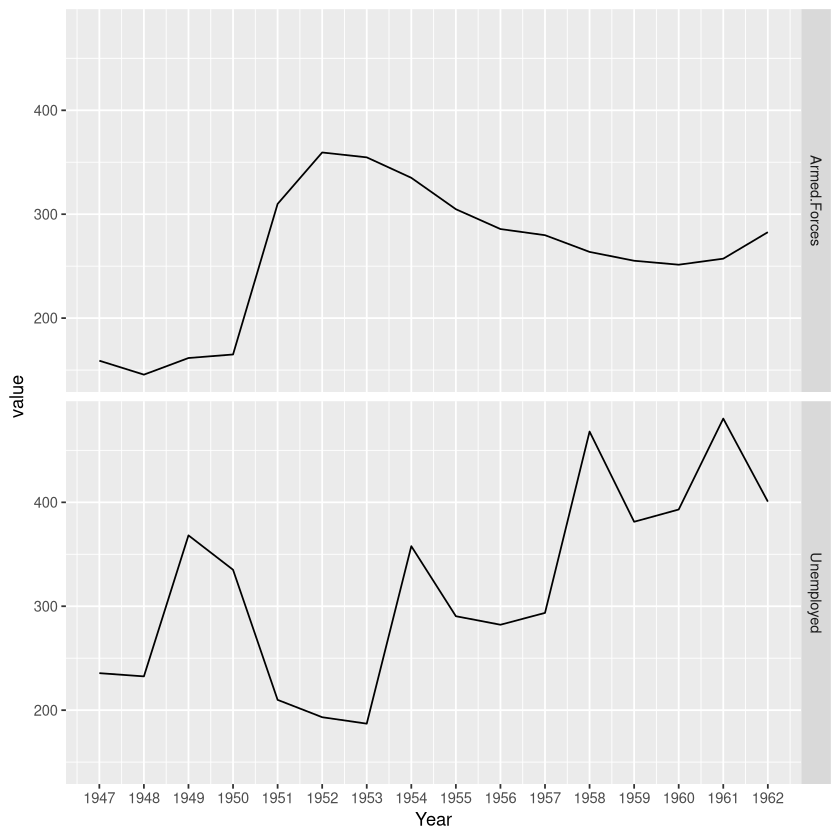

In [68]:
longley %>% gather(key, value, Unemployed, Armed.Forces) %>%
    ggplot(aes(x = Year, y = value)) + geom_line() +
    scale_x_continuous(breaks = 1947:1962) +
    facet_grid(key ~ .)

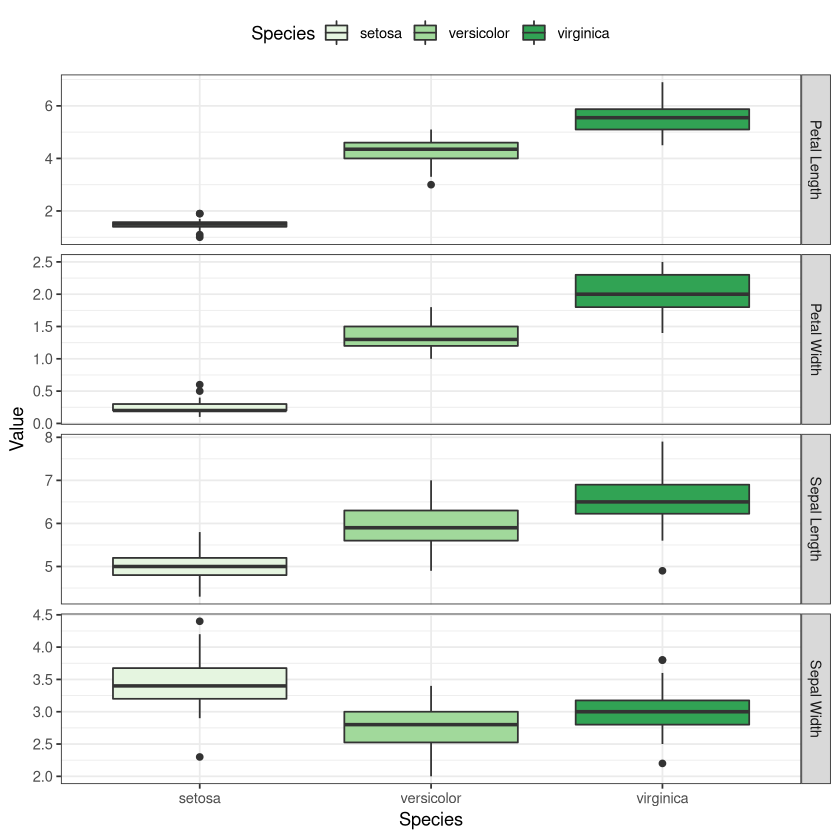

In [80]:
iris %>% gather(Measurement, Value, -Species) %>%
    ggplot(aes(x = Species, y = Value, fill=Species)) +
    geom_boxplot() +
    #scale_fill_manual(values = c("purple", "gray", "salmon")) +
    scale_fill_brewer(palette = "Greens") + 
    facet_grid(Measurement ~ ., scale = "free_y", labeller = labeller(Measurement = label_map)) +
    theme(legend.position = "top")